<h1 style="text-align: center;">TIME SERIES EXPLORATION</h1>

### Objectives

1. **Analyze temporal patterns** in electricity demand at multiple time scales (hourly, daily, weekly, and monthly)
2. **Decompose the time series** into its fundamental components: trend, seasonality, and residuals

### Dataset Overview

The dataset contains **16,318 observations** of UK electricity demand from January 1 to December 5, 2024, recorded at 30-minute intervals. Key variables include:

- **Electricity demand** (GW): National grid demand
- **Timestamp**: Date and time of measurement
- **Settlement period**: UK market convention (1-48 per day)
- **Temperature**: External temperature in Celsius
- **Holiday indicator**: Flag for public holidays

    **Settlement period**: The settlement_period is a number timestamp 1 to 48 that represents the half-hourly time     periods in a day used by the UK electricity market.
    Each settlement period corresponds to a 30-minute interval:
    It's a standard convention used in the UK electricity market for trading, billing,  and settlement purposes. The    day is divided into 48 half-hour periods, and   electricity is bought, sold, and measured for each settlement  period. 

### Key Concepts

**Time Series Analysis** involves examining data points collected over time to identify patterns, trends, and relationships. The goal is to understand the underlying structure and drivers of temporal variation.

**Seasonal Decomposition** breaks down a time series into interpretable components:
- **Trend**: The long-term direction or movement (increasing, decreasing, or stable)
- **Seasonality**: Repeating patterns at fixed intervals (daily, weekly, yearly cycles)
- **Residual**: Irregular fluctuations not explained by trend or seasonality




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
from ydata_profiling import ProfileReport
from statsmodels.tsa.seasonal import seasonal_decompose

# Import data,  EDA and timestamp decomposition  

**EDA**:  
   I used the Python library [ydata-profiling](https://pypi.org/project/ydata-profiling/) (formerly pandas profiling). You can explore other data visualization libraries in this article: [5 Powerful Python Libraries for EDA](http://towardsdatascience.com/5-powerful-python-libraries-you-need-to-know-to-enhance-your-eda-process-f0100d563c16/).

In [2]:
df=pd.read_csv("UK_electricity_demand_2024.csv")
df

,timestamp,settlement_period,electricity_demand,is_holiday,day_of_year,hour,year,temperature_C
0,2024-01-01 00:00:00,1,19.539,1,1,0.0,2024,4.1
1,2024-01-01 00:30:00,2,20.286,1,1,0.5,2024,3.4
2,2024-01-01 01:00:00,3,20.070,1,1,1.0,2024,3.4
3,2024-01-01 01:30:00,4,19.424,1,1,1.5,2024,4.4
4,2024-01-01 02:00:00,5,18.674,1,1,2.0,2024,2.2
...,...,...,...,...,...,...,...,...
16313,2024-12-05 21:30:00,44,27.212,0,340,21.5,2024,3.2
16314,2024-12-05 22:00:00,45,25.477,0,340,22.0,2024,4.2
16315,2024-12-05 22:30:00,46,24.428,0,340,22.5,2024,3.5
16316,2024-12-05 23:00:00,47,22.590,0,340,23.0,2024,1.7


In [ ]:
# EDA 
'''
ydata-prfoling produces a HTML file with statistic sumamrize and vizualization of each variable (column)
'''
profile = ProfileReport(df, title="UK 2023-2024")
profile.to_notebook_iframe()

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# time extraction
df["date"]=df['timestamp'].dt.strftime('%y-%m-%d')
df["year"]=df["timestamp"].dt.year
df["month"]=df["timestamp"].dt.month
df["month_name"]=df["timestamp"].dt.strftime("%B")
df['week'] = df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
df["day"]=df["timestamp"].dt.day
df["day_unique"]=df["timestamp"].dt.day_of_year 
df["day_name"]=df["timestamp"].dt.day_name()
df['day_Type'] = df['timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df["day_2"]=df["timestamp"].dt.to_period("D").apply(lambda r: r.start_time)
df["hour"]=df["timestamp"].dt.to_period("H").apply(lambda r: r.start_time) 
df

/var/folders/77/thbhtfx5753f1j0bt0__myth0000gn/T/ipykernel_4527/3363814516.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["hour"]=df["timestamp"].dt.to_period("H").apply(lambda r: r.start_time)


,timestamp,settlement_period,electricity_demand,is_holiday,day_of_year,hour,year,temperature_C,date,month,month_name,week,day,day_unique,day_name,day_Type,day_2
0,2024-01-01 00:00:00,1,19.539,1,1,2024-01-01 00:00:00,2024,4.1,24-01-01,1,January,2024-01-01,1,1,Monday,Weekday,2024-01-01
1,2024-01-01 00:30:00,2,20.286,1,1,2024-01-01 00:00:00,2024,3.4,24-01-01,1,January,2024-01-01,1,1,Monday,Weekday,2024-01-01
2,2024-01-01 01:00:00,3,20.070,1,1,2024-01-01 01:00:00,2024,3.4,24-01-01,1,January,2024-01-01,1,1,Monday,Weekday,2024-01-01
3,2024-01-01 01:30:00,4,19.424,1,1,2024-01-01 01:00:00,2024,4.4,24-01-01,1,January,2024-01-01,1,1,Monday,Weekday,2024-01-01
4,2024-01-01 02:00:00,5,18.674,1,1,2024-01-01 02:00:00,2024,2.2,24-01-01,1,January,2024-01-01,1,1,Monday,Weekday,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,2024-12-05 21:30:00,44,27.212,0,340,2024-12-05 21:00:00,2024,3.2,24-12-05,12,December,2024-12-02,5,340,Thursday,Weekday,2024-12-05
16314,2024-12-05 22:00:00,45,25.477,0,340,2024-12-05 22:00:00,2024,4.2,24-12-05,12,December,2024-12-02,5,340,Thursday,Weekday,2024-12-05
16315,2024-12-05 22:30:00,46,24.428,0,340,2024-12-05 22:00:00,2024,3.5,24-12-05,12,December,2024-12-02,5,340,Thursday,Weekday,2024-12-05
16316,2024-12-05 23:00:00,47,22.590,0,340,2024-12-05 23:00:00,2024,1.7,24-12-05,12,December,2024-12-02,5,340,Thursday,Weekday,2024-12-05


# Timeseries anaylsis

## Time Plot, Line Plot and Density plot

1. Time plot
- create a figure with a large size (30*20)
- use df2.index  

2. Line plot
- mean daily electrcity demand  
- mean monthly electrcity demand
  
3. Histogram plot


In [ ]:
# df_indexed set index to "date"

In [ ]:
# Time plot
# use plt.plot(x,y,marker,markersize)
# set plt.gca().set_xticklabels([])



In [ ]:
# Line plot1 - daily electricty demand


In [ ]:
#Line plot2 - mean of monthly energy consumption



In [ ]:
time_aggregated = [
    df.groupby("date")["electricity_demand"].sum().reset_index(),
    df.groupby("week")["electricity_demand"].sum().reset_index(),
    df.groupby("month")["electricity_demand"].sum().reset_index()
]
groupby_cols = ['date', 'week', "month"]
labels = ['Daily', 'Monthly', 'Weekly']

# for ..., in zip(...):


In [ ]:
# Histogram or density plot
# sns.histplot(x, y , kde)


## Seasonal decomposition

Use package [from statsmodels.tsa.seasonal import seasonal_decompose] (https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

Important **parameters**:  
- model = additive vs multiplicativen  
  Additive -> the seasonal variations have constant amplitude over time  
  y(t) = Level + Trend + Seasonality + Noise  
  Multiplicative -> the seasonal variations scale proportionally with the trend level  
  y(t) = Level * Trend * Seasonality * Noise   
- period = how many observations make one complete cycle  
  
    In this case: data is recorded every 30 minutes and there are 48 half-hour in a day  
    period=48 -> daily seasonality  
    period=336 -> weekly seasonality  
    period=2 -> hourly seasonality  

Use seasonal_decompose from from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
df_indexed = df.set_index("date")
df_indexed.columns

Index(['timestamp', 'settlement_period', 'electricity_demand', 'is_holiday',
       'day_of_year', 'hour', 'year', 'temperature_C', 'month', 'month_name',
       'week', 'day', 'day_unique', 'day_name', 'day_Type', 'day_2'],
      dtype='object')

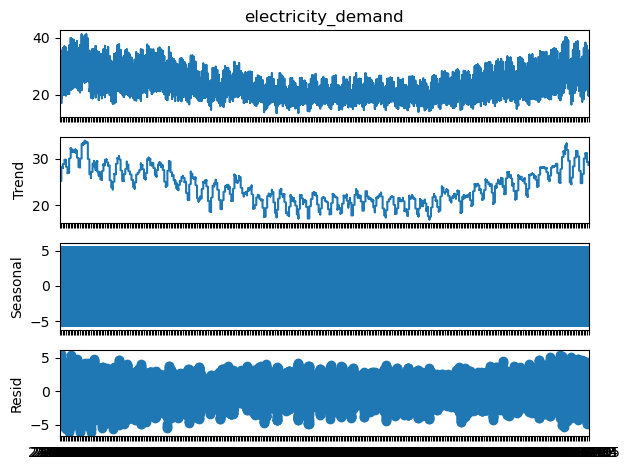

In [ ]:
#Set Date as index for seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

df_indexed = df.set_index("date")
# call the model "decomposition"

#fig, axes = plt.subplots(4, 1, figsize=(30, 26))

# Original data - do not forget to set the ax=axes[]

# Trend component


# Seasonal component


# Residual (remainder) component
